In [51]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [52]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [53]:
%pip install tensorflow-datasets
%pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [54]:
%pip install --upgrade pip setuptools

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf

In [4]:

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [1]:
for gpu in gpus:
    print(gpu)

NameError: name 'gpus' is not defined

In [2]:
import tensorflow_datasets as tfds
from matplotlib import pyplot as plt

In [3]:
ds = tfds.load('fashion_mnist', split='train')

In [9]:
import tensorflow as tf

# Load dataset from local directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/HP/Documents/Programs/Cynaptics/Data/Train/Real",
    validation_split=None,
    seed=123,
    image_size=(64, 64),  # Adjust size as needed
    batch_size=32
)

# Optimize performance
AUTOTUNE = tf.data.AUTOTUNE
dataset = dataset.cache().prefetch(buffer_size=AUTOTUNE)

Found 0 files belonging to 0 classes.


ValueError: No images found in directory C:/Users/HP/Documents/Programs/Cynaptics/Data/Train/Real. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [60]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [61]:
import numpy as np
dataiterator = ds.as_numpy_iterator() # set up a connection to the dataset

In [62]:
np.squeeze(dataiterator.next()['image']).shape  # get the next batch of data

(28, 28)

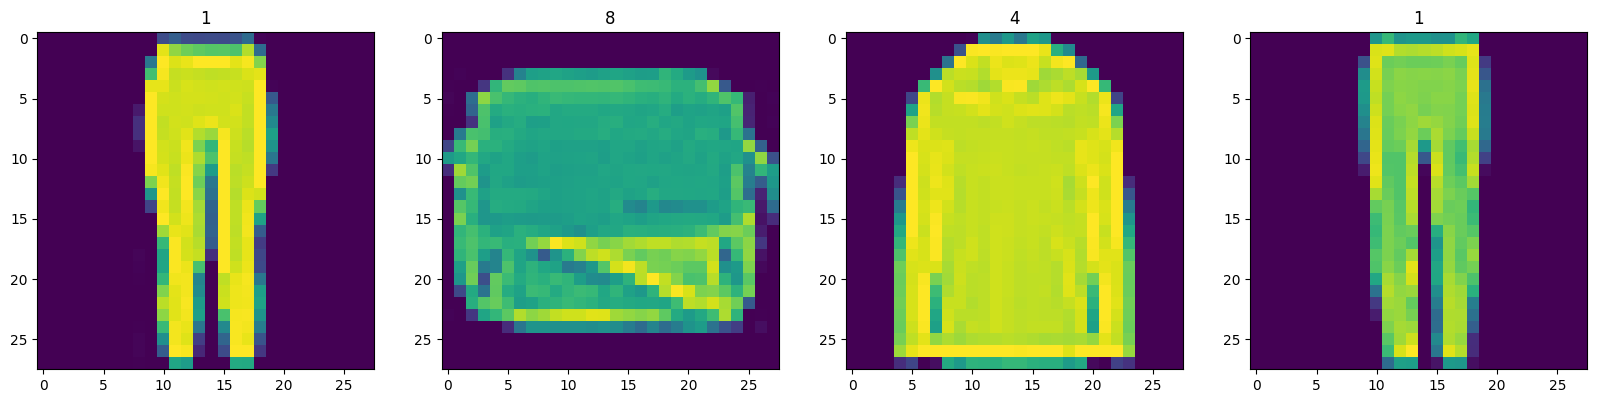

In [63]:
# Set up the sub-plot format

fig ,ax = plt.subplots(ncols = 4,figsize=(20,20)) # fig is whole plot , ax is each subplot
for idx in range(4):
  #grab an image and label
  batch = dataiterator.next() # A sample
  #Plot the image using a spicific axis
  ax[idx].imshow(np.squeeze(batch['image'])) # plot using a specific subplot
  ax[idx].set_title(batch['label']) #Appending image lable as plot title

In [64]:
# Data processing , scaling images to 0-1
def scale_images(data):
  image = data['image']
  return image/ 255

In [65]:
# dataset
ds = tfds.load('fashion_mnist', split='train') # Reloaded dataset , optional
ds = ds.map(scale_images) # Running dataset through the scaling function
ds = ds.cache() # Caching the dataset for that batch
ds = ds.shuffle(60000) #Shuffling the dataset
ds = ds.batch(128) # Dividing the dataset into batches of 128
ds = ds.prefetch(64)  # Eliminates bottelneckind by prefetching the next batch

In [66]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

In [67]:
#Bringing in sqquential api for generator and discriminator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, Reshape , Flatten, Conv2D, Dropout,UpSampling2D


In [68]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [69]:
def build_generator():
  model = Sequential()
  model.add(Dense(7*7*128, input_dim=128))
  model.add(LeakyReLU(0.2))
  model.add(Reshape((7,7,128)))
  
  #Upsampling block 1
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))
  
  #Upsampling block 2
  model.add(UpSampling2D())
  model.add(Conv2D(128, 5, padding='same'))
  model.add(LeakyReLU(0.2))
  
  #Down sampling block 1 ,not really , conv block
  model.add(Conv2D(128, 4 , padding='same'))
  model.add(LeakyReLU(0.2))
  
  #Down sampling block 2 ,not really , conv block
  model.add(Conv2D(128, 4 , padding='same'))
  model.add(LeakyReLU(0.2))
  
  #Conv layer to one channel
  model.add(Conv2D(1, 4, activation='sigmoid', padding='same'))
  
  return model


In [70]:
from tensorflow.keras.activations import get

In [71]:
generator = build_generator()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [72]:
generator.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 6272)           │       809,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_26 (LeakyReLU)      │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 14, 14, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_27 (LeakyReLU)      │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_28 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_29 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 28, 28, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_30 (LeakyReLU)      │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 28, 28, 1)      │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,137 (8.22 MB)

 Trainable params: 2,155,137 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
#Testing the generator
img = generator.predict(np.random.randn(4,128,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


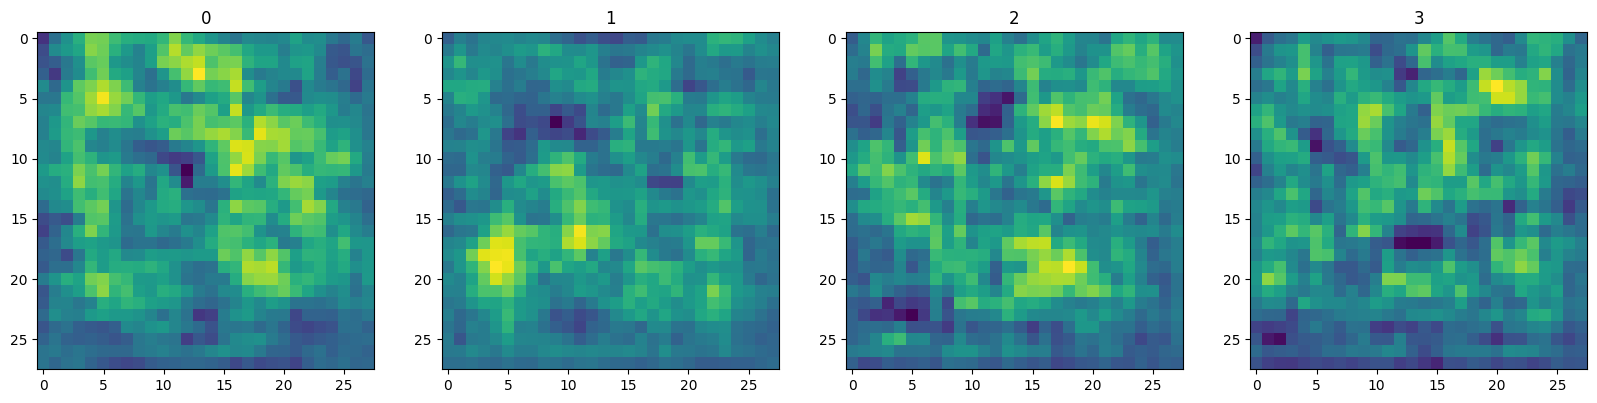

In [74]:
# Set up the sub-plot format

fig ,ax = plt.subplots(ncols = 4,figsize=(20,20)) # fig is whole plot , ax is each subplot
for idx , img in enumerate(img):

  #Plot the image using a spicific axis
  ax[idx].imshow(np.squeeze(img)) # plot using a specific subplot
  ax[idx].set_title(idx) #Appending image lable as plot title

In [75]:
def build_discriminator():
  model = Sequential()
  
  #First Conv block
  model.add(Conv2D(32 , 5, input_shape=(28,28,1)))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
  #Second Conv block
  model.add(Conv2D(64 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
  #Third Conv block
  model.add(Conv2D(128 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
  #Forth Conv block
  model.add(Conv2D(256 , 5))
  model.add(LeakyReLU(0.2))
  model.add(Dropout(0.4))
  
  #Flatten then pass through dense layer
  model.add(Flatten())
  model.add(Dropout(0.4))
  model.add(Dense(1, activation='sigmoid'))
  
  return model

In [76]:
discriminator = build_discriminator()
discriminator.summary()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_31 (LeakyReLU)      │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_32 (LeakyReLU)      │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 16, 16, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_33 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 12, 12, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_34 (LeakyReLU)      │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,113,345 (4.25 MB)

 Trainable params: 1,113,345 (4.25 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
img.shape

(28, 28, 1)

In [78]:
discriminator.predict(np.expand_dims(img,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[0.50179636]], dtype=float32)

In [79]:
# Importing the optimizer and loss function
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [80]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)

In [81]:
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [100]:
#mporting base model class into sub-class
from tensorflow.keras.models import Model

In [101]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [84]:
tf.ones_like(tf.random.normal((6,128)))

<tf.Tensor: shape=(6, 128), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1

In [102]:
#Create instance of the subclass model
fashgan = FashionGAN(generator , discriminator)
#Compile the model
fashgan.compile(g_opt , d_opt , g_loss , d_loss)


In [103]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [104]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('generated_images', f'generated_img_{epoch}_{i}.png'))

In [105]:
hist = fashgan.fit(ds , epochs = 2000 ,callbacks = [ModelMonitor()])

Epoch 1/20
 32/469 ━━━━━━━━━━━━━━━━━━━━ 1:58:08 16s/step - d_loss: 0.6885 - g_loss: 0.7167

KeyboardInterrupt: 

In [ ]:
plt.suptitle('Loss')
plt.plot(hist.history['d_loss'], label='Discriminator Loss')
plt.plot(hist.history['g_loss'], label='Generator Loss')
plt.legend()
plt.show()

In [119]:
# Ensure the generator model is built correctly
generator = build_generator()
generator.load_weights("C:/Users/HP/Downloads/generatormodel.h5")

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(128, 6272), Received: value.shape=(1, 256). Target variable: <KerasVariable shape=(128, 6272), dtype=float32, path=sequential_16/dense_14/kernel>

In [115]:
imgs = generator(tf.random.normal((16 , 128 , 1)), training=False)

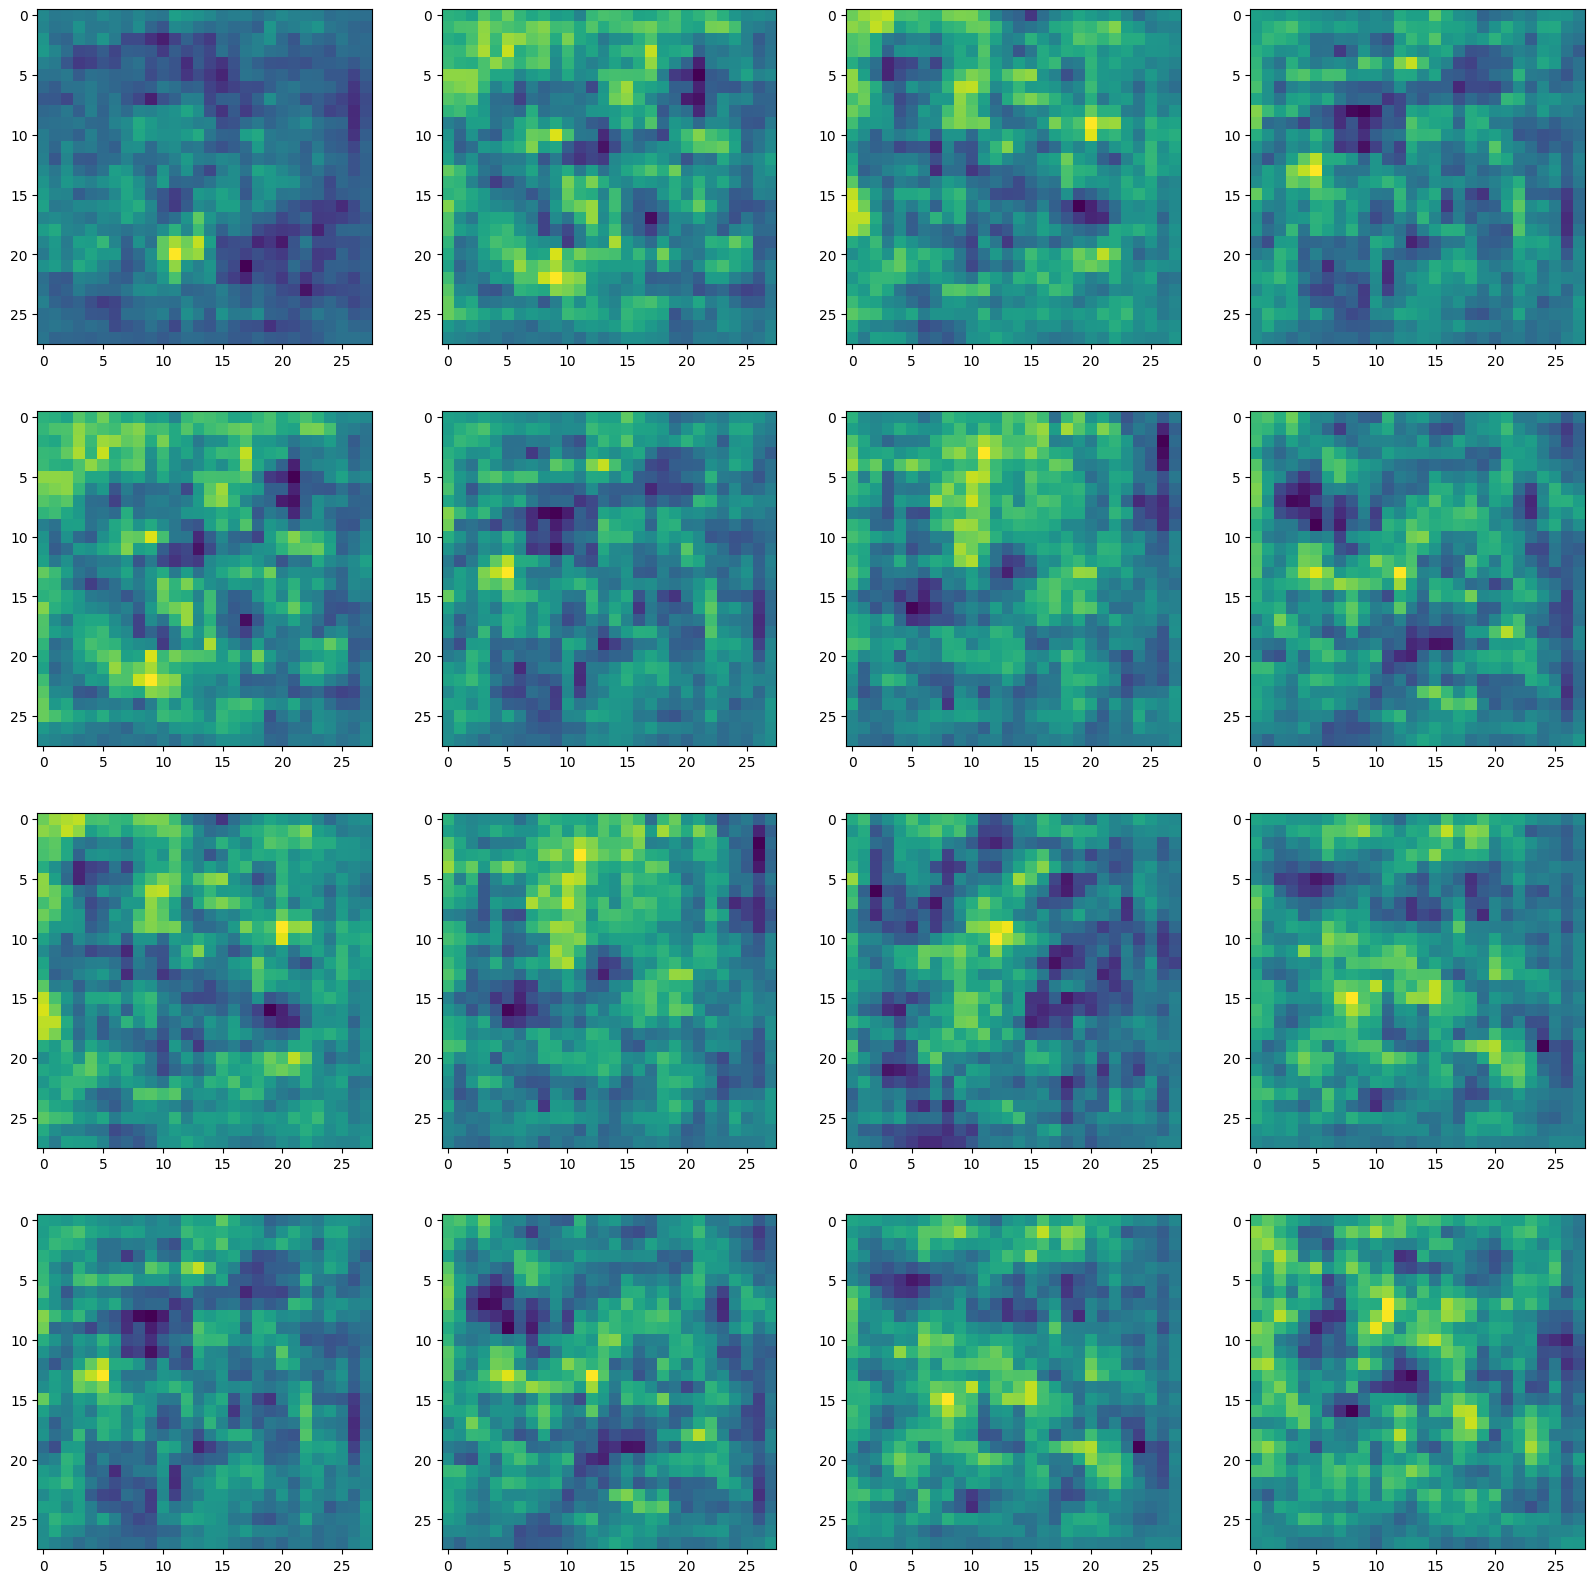

In [117]:
fig , ax = plt.subplots(ncols = 4,nrows =4 , figsize=(20,20))
for idx in range(4):
  for c in range(4):
    ax[idx][c].imshow(imgs[(idx+1)*(c+1)-1])